**Data Preprocessing**


In [23]:
import pandas as pd
df = pd.read_excel('/content/analysis.xlsx')
df.head(10)

,PHONE_NAME,RAM,ROM
0,CMF by Nothing Phone 2 Pro (White),8 GB / 12 GB,256 GB
1,Nothing Phone (3a) (Blue),8 GB,256 GB
2,REDMI A3X (Olive Green),3 GB / 4 GB,64 GB
3,REDMI A3X (Ocean Green),3 GB / 4 GB,64 GB
4,Nothing Phone (3a) Pro (Grey),8 GB / 12 GB,256 GB
5,Motorola g45 5G (Brilliant Blue),8 GB,128 GB
6,SAMSUNG Galaxy F05 (Twilight Blue),4 GB,64 GB
7,vivo T4x 5G (Pronto Purple),8 GB,128 GB
8,MOTOROLA g05 (Forest Green),4 GB,64 GB
9,MOTOROLA g35 5G (Guava Red),4 GB / 6 GB,128 GB


In [24]:
from datascrap import ratings as r, people as reviews, online_response as expert_review

24
24
24


In [25]:
df['expert_reviews'] = expert_review
df['people_reviews'] = reviews
df['ratings'] = r

In [26]:
df.head(10)

,PHONE_NAME,RAM,ROM,expert_reviews,people_reviews,ratings
0,CMF by Nothing Phone 2 Pro (White),8 GB / 12 GB,256 GB,[Loving the clean Android experience and the u...,[I bought it because of camera i saw in online...,4.40
1,Nothing Phone (3a) (Blue),8 GB,256 GB,[The transparent back is so cool! It definitel...,[Best for value Nice performance.Audio quality...,4.50
2,REDMI A3X (Olive Green),3 GB / 4 GB,64 GB,[Great budget phone for basic use. Calls and m...,[Cheap and best. Fine design.But sometimes it ...,3.80
3,REDMI A3X (Ocean Green),3 GB / 4 GB,64 GB,"[Same as the Olive Green one, it's a reliable ...","[Worth of money, Too slow the processor is lac...",3.80
4,Nothing Phone (3a) Pro (Grey),8 GB / 12 GB,256 GB,[The 'Pro' version feels more premium. The cam...,"[Very nice and beautiful phone, Just buy it br...",3.75
5,Motorola g45 5G (Brilliant Blue),8 GB,128 GB,[The 120Hz display is smooth for scrolling and...,"[Good Phone, was searching for this colour in ...",4.10
6,SAMSUNG Galaxy F05 (Twilight Blue),4 GB,64 GB,[Reliable Samsung phone for basic use. Battery...,"[Phone looks is very nice, but one thing Phone...",4.10
7,vivo T4x 5G (Pronto Purple),8 GB,128 GB,"[Fast charging is a game-changer, the phone ch...",[Excellent Performance with good Battery Backu...,4.50
8,MOTOROLA g05 (Forest Green),4 GB,64 GB,[Clean Android experience with no bloatware. E...,"[Mobile bad not working properly, This mobile ...",3.90
9,MOTOROLA g35 5G (Guava Red),4 GB / 6 GB,128 GB,[5G connectivity at an affordable price. Batte...,[The camera is good at this price range .Ram c...,4.10


**Rating Criterion**

**1.0 - 1.9: Very Poor. Significant issues, highly dissatisfied.**

**2.0 - 2.9: Poor. Noticeable problems, generally dissatisfied.**

**3.0 - 3.4: Below Average. Some shortcomings, mixed feelings.**

**3.5 - 3.9: Average. Met expectations, neither particularly good nor bad.**

**4.0 - 4.4: Good. Generally positive, some minor areas for improvement.**

**4.5 - 5.0: Excellent. Highly positive, very satisfied.** **bold text**

In [27]:
def get_mobile_grade(rating):
  if 1.0 <= rating <= 1.9:
    return "Very Poor"
  elif 2.0 <= rating <= 2.9:
    return "Poor"
  elif 3.0 <= rating <= 3.4:
    return "Below Average"
  elif 3.5 <= rating <= 3.9:
    return "Average"
  elif 4.0 <= rating <= 4.4:
    return "Good"
  elif 4.5 <= rating <= 5.0:
    return "Excellent"
  else:
    return "Invalid Rating"



In [28]:
df['grade'] = df['ratings'].apply(get_mobile_grade)
print("\nDataFrame with Grades:")
df.head()


DataFrame with Grades:


,PHONE_NAME,RAM,ROM,expert_reviews,people_reviews,ratings,grade
0,CMF by Nothing Phone 2 Pro (White),8 GB / 12 GB,256 GB,[Loving the clean Android experience and the u...,[I bought it because of camera i saw in online...,4.40,Good
1,Nothing Phone (3a) (Blue),8 GB,256 GB,[The transparent back is so cool! It definitel...,[Best for value Nice performance.Audio quality...,4.50,Excellent
2,REDMI A3X (Olive Green),3 GB / 4 GB,64 GB,[Great budget phone for basic use. Calls and m...,[Cheap and best. Fine design.But sometimes it ...,3.80,Average
3,REDMI A3X (Ocean Green),3 GB / 4 GB,64 GB,"[Same as the Olive Green one, it's a reliable ...","[Worth of money, Too slow the processor is lac...",3.80,Average
4,Nothing Phone (3a) Pro (Grey),8 GB / 12 GB,256 GB,[The 'Pro' version feels more premium. The cam...,"[Very nice and beautiful phone, Just buy it br...",3.75,Average


In [29]:
# Find Excellent phone names
excellent_phones = df[df['grade'] == 'Excellent']['PHONE_NAME'].tolist()
print("\nExcellent Phones:")
for phone in excellent_phones:
    print(f"- {phone}")
# Find Average mobiles (Top 5 Highest Rating )
average_df = df[df['grade'] == 'Average'].sort_values(by='ratings', ascending=False)
top_5_average_phones = average_df['PHONE_NAME'].head(5).tolist()
print("\nTop 5 Average Phones (Highest Rating First):")
for phone in top_5_average_phones:
    print(f"- {phone}")



Excellent Phones:
- Nothing Phone (3a) (Blue)
- vivo T4x 5G (Pronto Purple)

Top 5 Average Phones (Highest Rating First):
- POCO C75 5G (Aqua Bliss)
- Motorola g45 5G (Pink Lavender)
- MOTOROLA g05 (Forest Green)
- POCO C75 5G (Enchanted Green)
- REDMI A3X (Midnight Black)


In [30]:
# Count of Poor mobiles
poor_count = len(df[df['grade'] == 'Poor'])
print(f"Count of Poor Mobiles: {poor_count}")

# Count of Very Poor mobiles
very_poor_count = len(df[df['grade'] == 'Very Poor'])
print(f"Count of Very Poor Mobiles: {very_poor_count}")

# Count of Below Average mobiles
below_average_count = len(df[df['grade'] == 'Below Average'])
print(f"Count of Below Average Mobiles: {below_average_count}")

Count of Poor Mobiles: 0
Count of Very Poor Mobiles: 0
Count of Below Average Mobiles: 0


Given the consistently positive expert reviews that may indicate bias, this analysis will prioritize user feedback for a more balanced perspective.

Examining real-world user experiences can reveal potential issues not highlighted by official testers.

This approach aims for a more objective and trustworthy evaluation of the mobile phone.

In [31]:
# People sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

people = [
    ["I bought it because of camera i saw in online but after purchase it seems different in quality not better than nothing 2a in camera. It seems its not 16mp front but 8 mp camera",
     "The incoming call voice had some disturbance even noise reduction on. Please tell me to correct",
     "Dnt go with paper spec, it is far superior. One of best all rounder phone under 20k",
     "Performance is not good",
     "speaker is very bad. Don't buy it."],
    ["Best for value Nice performance.Audio quality also good Just required little more improvements",
     "he camera is awesome, UI is simple and clean",
     "Good phone, but software has lots of issues.Android Auto doesn't work with my Skoda Slavia And the screen flickered when I had bloomberg news app installed",
     "Worth for this budget for normal users",
     "Bettery is only six hour Phone hot soon N hang problem also"],
    ["Cheap and best. Fine design.But sometimes it hang. However it is best at this price",
     "Over heat phone waste money don't purchase",
     "Average phone as per it's price.",
     "Not good phone",
     "Very bad, very hang from the starting."],
    ["Worth of money",
     "Too slow the processor is lacking too much",
     "Battary backup note good",
     "Very cool phone price range better phone.",
     "Good"],
    ["Very nice and beautiful phone",
     "Just buy it bro .. damn sure you will not regret. Love this phone.Go with the grey . It is better . It looks better.",
     "Good mobile no doubt",
     "Delivers sharp, detailed close up shot with excellent clarity .Bloatware free with smooth navigation and ai powered features for enhanced performance",
     "It takes 3 hour's to fully charge"],
    ["Good Phone, was searching for this colour in images to see how it looks in real, so posting it for someone who might be looking to buy in this colour",
     "Heating problem and charger is also not working",
     "Mobile is the very good all feature right only camera full zoom picture not good",
     "Very smooth and 120hz refresh rate smoother experience gaming is very super",
     "Product is not bad"],
    ["Phone looks is very nice, but one thing Phone Charger is necessary, but nowadays Samsung is not provide a charger, its unfair.",
     "Not happy",
     "Processor is very slow",
     "Very bad product data usage very very bad",
     "Nice phone on budget. Good for senior citizens"],
    ["Excellent Performance with good Battery Backup.Camera is Decent.",
     "Worth every penny. All in one smartphone. Recommended.",
     "Good",
     "Don't buy",
     "Not satisfied with the camera"],
    ["Mobile bad not working properly",
     "This mobile is very good mobile Display very clean",
     "Very good nice. I liked.These are very good phones for the money. We really liked them .",
     "I newly opened this phone and i was checking the phone the phone was lagging too much i didn't installed anything yet but it's too much lagging I m not satisfied by your product worst experience I have ever seen.",
     "Software not working and phone to much hanging"],
    ["The camera is good at this price range .Ram could be increased to 6gb atleast",
     "For the price excellent mobile and very very prompt delivery from Flipkart. Was delivered in six hours",
     "At this price range every thing is very good.Battery 🔋 not feels like 5000mh draining very fast but you know a long display and performance good enough.When I open the box it seems like I am not who open it first . Screen has many fingerprints and screen tape have many bubbles .And the end nice product by Motorola 👍😊",
     "Wifi network issue. Laggy ui.",
     "Waste phone 📱 hanging...not working best"],
    ["Nice phone I am very happy with phone",
     "Very bad, very hang from the starting",
     "The delivery boy was denying to open the box as it was the open box delivery. After that he started abusing and shouting worst experience not going to order anything from flipkart now. Please make sure customer satisfaction is the most important thing and this type of people make our experience worst.",
     "Average phone as per it's price.",
     "Average phone... good for aged people or as a secondary device."],
    ["This is perfect Phone is this segment 🔥🔥Best in camera",
     "Too good phone and bigg display ossm expressions I",
     "The camera quality is awesome😁 ...the display also awesome😄...the battery life is too awesome😃...but only one problem ..u can't do heavy games...😅All-rounder phone...📱",
     "Only heavy weight this is only one drawback ......all phone is awesome and excellent...camera, display, battery backup and performance is fantastic and very very awesome love you samsung",
     "Battery is Horrible It reduces damn fast, and even Camera is not that good."],
    ["Awesome",
     "Budget friendly 5G phone with good configuration.",
     "Poor",
     "Very poor Quality too much heating like heater",
     "nice product"],
    ["Good Phone, was searching for this colour in images to see how it looks in real, so posting it for someone who might be looking to buy in this colour",
     "BEST BUDGET 5G PHONE!",
     "Heating problem and charger is also not working",
     "Slow process I ansewer call after 1 minute",
     "Budget phone with all features and exclusive experience to use"],
    ["Please Camera improve",
     "Double touch screen on function no.power key ,back,manu,key alternative is better.",
     "Not cover not processing working slow",
     "Very nice product I am so happy",
     "Good"],
    ["Camera is not good Display is blur little bit",
     "Comfortable for Family members",
     "Value for money 👍, also love the style of this phone 😍",
     "Don't bye this product he is very bad product please all Flipkart usares don't buy this product please",
     "Sound quality is bad and slow work this mobile"],
    ["It's a budget friendly phone.",
     "Not cover not processing working slow",
     "Phone is getting heat",
     "Good price range",
     "Thise price range in The good all rounder smartphone."],
    ["No back case and only 10W charger is provided. In description they mentioned 18W charger in box and back case also. Good for Parents.",
     "Battery problem Camera problem",
     "It's budget phone",
     "Excellent in this budget",
     "Very delicate. Stopped working after 1 month."],
    ["It is quite pleasant. Totally recommended",
     "he phone was good and butter smooth but the delivery experience by Ekart was too bad very bad service by Ekart",
     "Mobile is good and best for handling.",
     "Very Bad Product, Within a month The Speaker not working properly, i Can't hear the voice from other end without speaker mode.",
     "ery Bad Product, Within a month The Speaker not working properly, i Can't hear the voice from other end without speaker mode."],
    ["Only Best 5G smartphone with enough budget,loved it to gift my grandmother",
     "Whether gaming or streaming, the display delivers every time. The refresh rate is smooth, and the colors pop beautifully. Its acutely great for an LCD display",
     "Good mobile according to price",
     "Go for it 😀",
     "What poco is offering for the price is just awesome.Decent camera, decent display decent everything in this phone.Price to quality is very very good"],
    ["Really nice product.",
     "Front camera is below average",
     "Mobile has a technical problem as it gets hanged again and again......",
     "Worst phone don't buy, heating and low performance",
     "Camera could have been better, it AI puts extra light effect in every shoot. Official Gallery app, music app, app lock features are missing which is now a days are necessary features."],
    ["Good mobile",
     "Poor",
     "Budget friendly 5G phone with good configuration.",
     "Battery drainage is to fast.",
     "Good product"],
    ["Like this phone Redmi A5",
     "It's a budget friendly phone.",
     "Sound and mike issue and heating problem",
     "Excellent work",
     "Phone is getting heat"],
    ["Power off on key. Volume key not good.... Very bad quality",
     "Poor photo (blurry and looks fake) and worst video recording from front camera in direct sunlight",
     "Budget phone is very superb phone",
     "Normal",
     "Phone power button not working very disappointed"]
]

analyzer = SentimentIntensityAnalyzer()
phone_sentiments = []

for i, reviews in enumerate(people):
    positive_count = 0
    negative_count = 0
    neutral_count = 0
    compound_scores = []

    for review in reviews:
        vs = analyzer.polarity_scores(review)
        compound_scores.append(vs['compound'])

        if vs['compound'] >= 0.05:
            positive_count += 1
        elif vs['compound'] <= -0.05:
            negative_count += 1
        else:
            neutral_count += 1

    avg_compound = sum(compound_scores) / len(compound_scores) if compound_scores else 0

    sentiment_label = "Neutral"
    if avg_compound >= 0.05:
        sentiment_label = "Positive"
    elif avg_compound <= -0.05:
        sentiment_label = "Negative"

    phone_name_parts = []
    if i == 0:
        phone_name_parts = ["CMF by Nothing Phone 2 Pro (White, 128 GB)"]
    elif i == 1:
        phone_name_parts = ["Nothing Phone (3a) (Blue, 256 GB)"]
    elif i == 2:
        phone_name_parts = ["REDMI A3X (Olive Green, 64 GB)"]
    elif i == 3:
        phone_name_parts = ["REDMI A3X (Ocean Green, 64 GB)"]
    elif i == 4:
        phone_name_parts = ["Nothing Phone (3a) Pro (Grey, 256 GB)"]
    elif i == 5:
        phone_name_parts = ["Motorola g45 5G (Brilliant Blue, 128 GB)"]
    elif i == 6:
        phone_name_parts = ["SAMSUNG Galaxy F05 (Twilight Blue, 64 GB)"]
    elif i == 7:
        phone_name_parts = ["vivo T4x 5G (Pronto Purple, 128 GB)"]
    elif i == 8:
        phone_name_parts = ["MOTOROLA g05 (Forest Green, 64 GB)"]
    elif i == 9:
        phone_name_parts = ["MOTOROLA g35 5G (Guava Red, 128 GB)"]
    elif i == 10:
        phone_name_parts = ["REDMI A3X (Midnight Black, 64 GB)"]
    elif i == 11:
        phone_name_parts = ["SAMSUNG Galaxy M35 5G (Moonlight Blue, 128 GB)"]
    elif i == 12:
        phone_name_parts = ["MOTOROLA g35 5G (Leaf Green, 128 GB)"]
    elif i == 13:
        phone_name_parts = ["Motorola g45 5G (Pink Lavender, 128 GB)"]
    elif i == 14:
        phone_name_parts = ["REDMI A5 (Just Black, 64 GB)"]
    elif i == 15:
        phone_name_parts = ["POCO C71 (Desert Gold, 64 GB)"]
    elif i == 16:
        phone_name_parts = ["REDMI A5 (Pondicherry Blue, 64 GB)"]
    elif i == 17:
        phone_name_parts = ["POCO C75 5G (Enchanted Green, 64 GB)"]
    elif i == 18:
        phone_name_parts = ["REDMI 13 5G (Orchid Pink, 128 GB)"]
    elif i == 19:
        phone_name_parts = ["POCO C75 5G (Aqua Bliss, 64 GB)"]
    elif i == 20:
        phone_name_parts = ["Motorola Edge 50 Fusion (Marshmallow Blue, 128"]
    elif i == 21:
        phone_name_parts = ["MOTOROLA g35 5G (Midnight Black, 128 GB)"]
    elif i == 22:
        phone_name_parts = ["REDMI A5 (Jaisalmer Gold, 64 GB)"]
    elif i == 23:
        phone_name_parts = ["Infinix Note 50s 5G+ (Burgundy Red, 128 GB)"]
    else:
        phone_name_parts = [f"Phone {i+1}"]

    phone_sentiments.append({
        "phone": phone_name_parts[0],
        "positive_reviews": positive_count,
        "negative_reviews": negative_count,
        "neutral_reviews": neutral_count,
        "avg_compound_score": avg_compound,
        "overall_sentiment": sentiment_label
    })

for sentiment in phone_sentiments:
    print(f"Phone: {sentiment['phone']}")
    print(f"  Positive Reviews: {sentiment['positive_reviews']}")
    print(f"  Negative Reviews: {sentiment['negative_reviews']}")
    print(f"  Neutral Reviews: {sentiment['neutral_reviews']}")
    print(f"  Average Compound Score: {sentiment['avg_compound_score']:.4f}")
    print(f"  Overall Sentiment: {sentiment['overall_sentiment']}")
    print("-" * 30)




Phone: CMF by Nothing Phone 2 Pro (White, 128 GB)
  Positive Reviews: 1
  Negative Reviews: 4
  Neutral Reviews: 0
  Average Compound Score: -0.1309
  Overall Sentiment: Negative
------------------------------
Phone: Nothing Phone (3a) (Blue, 256 GB)
  Positive Reviews: 4
  Negative Reviews: 1
  Neutral Reviews: 0
  Average Compound Score: 0.3537
  Overall Sentiment: Positive
------------------------------
Phone: REDMI A3X (Olive Green, 64 GB)
  Positive Reviews: 1
  Negative Reviews: 3
  Neutral Reviews: 1
  Average Compound Score: -0.0934
  Overall Sentiment: Negative
------------------------------
Phone: REDMI A3X (Ocean Green, 64 GB)
  Positive Reviews: 4
  Negative Reviews: 0
  Neutral Reviews: 1
  Average Compound Score: 0.3554
  Overall Sentiment: Positive
------------------------------
Phone: Nothing Phone (3a) Pro (Grey, 256 GB)
  Positive Reviews: 4
  Negative Reviews: 0
  Neutral Reviews: 1
  Average Compound Score: 0.5673
  Overall Sentiment: Positive
----------------------

In [32]:
from tabulate import tabulate
table_data = []
headers = ["Phone", "Overall Sentiment"]
for item in phone_sentiments:
    table_data.append([item['phone'], item['overall_sentiment']])

# Output the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+------------------------------------------------+---------------------+
| Phone                                          | Overall Sentiment   |
+================================================+=====================+
| CMF by Nothing Phone 2 Pro (White, 128 GB)     | Negative            |
+------------------------------------------------+---------------------+
| Nothing Phone (3a) (Blue, 256 GB)              | Positive            |
+------------------------------------------------+---------------------+
| REDMI A3X (Olive Green, 64 GB)                 | Negative            |
+------------------------------------------------+---------------------+
| REDMI A3X (Ocean Green, 64 GB)                 | Positive            |
+------------------------------------------------+---------------------+
| Nothing Phone (3a) Pro (Grey, 256 GB)          | Positive            |
+------------------------------------------------+---------------------+
| Motorola g45 5G (Brilliant Blue, 128 GB)       | 

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({'PHONE_NAME': df['PHONE_NAME'], 'RAM': df['RAM'], 'ROM': df['ROM'], 'ratings': df['ratings']})
# Clean and Process RAM and ROM Columns
def extract_max_ram(ram_str):
    if isinstance(ram_str, str):
        rams = [int(val.strip(' GB')) for val in ram_str.split('/')]
        return max(rams)
    return None

df['RAM_GB'] = df['RAM'].apply(extract_max_ram)
df['ROM_GB'] = df['ROM'].str.replace(' GB', '').astype(int)
df

,PHONE_NAME,RAM,ROM,ratings,RAM_GB,ROM_GB
0,CMF by Nothing Phone 2 Pro (White),8 GB / 12 GB,256 GB,4.40,12,256
1,Nothing Phone (3a) (Blue),8 GB,256 GB,4.50,8,256
2,REDMI A3X (Olive Green),3 GB / 4 GB,64 GB,3.80,4,64
3,REDMI A3X (Ocean Green),3 GB / 4 GB,64 GB,3.80,4,64
4,Nothing Phone (3a) Pro (Grey),8 GB / 12 GB,256 GB,3.75,12,256
5,Motorola g45 5G (Brilliant Blue),8 GB,128 GB,4.10,8,128
6,SAMSUNG Galaxy F05 (Twilight Blue),4 GB,64 GB,4.10,4,64
7,vivo T4x 5G (Pronto Purple),8 GB,128 GB,4.50,8,128
8,MOTOROLA g05 (Forest Green),4 GB,64 GB,3.90,4,64
9,MOTOROLA g35 5G (Guava Red),4 GB / 6 GB,128 GB,4.10,6,128



Average Rating by RAM:
RAM_GB
8     4.183333
12    4.116667
6     4.075000
4     3.885714
3     3.662500
Name: ratings, dtype: float64

Average Rating by ROM:
ROM_GB
256    4.216667
128    4.110000
64     3.804545
Name: ratings, dtype: float64


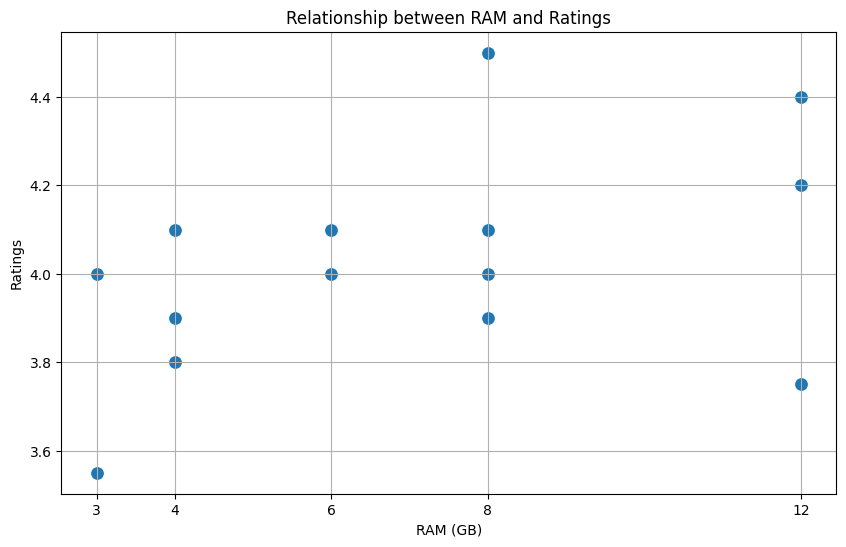

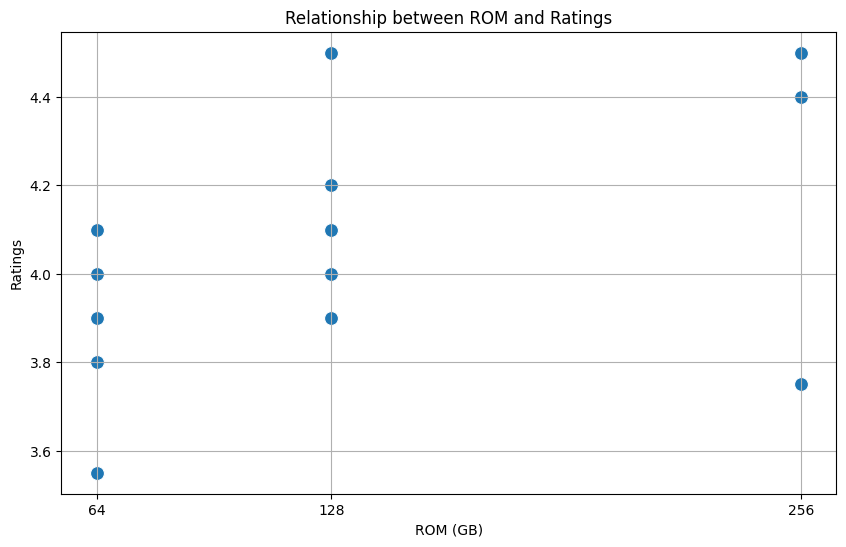

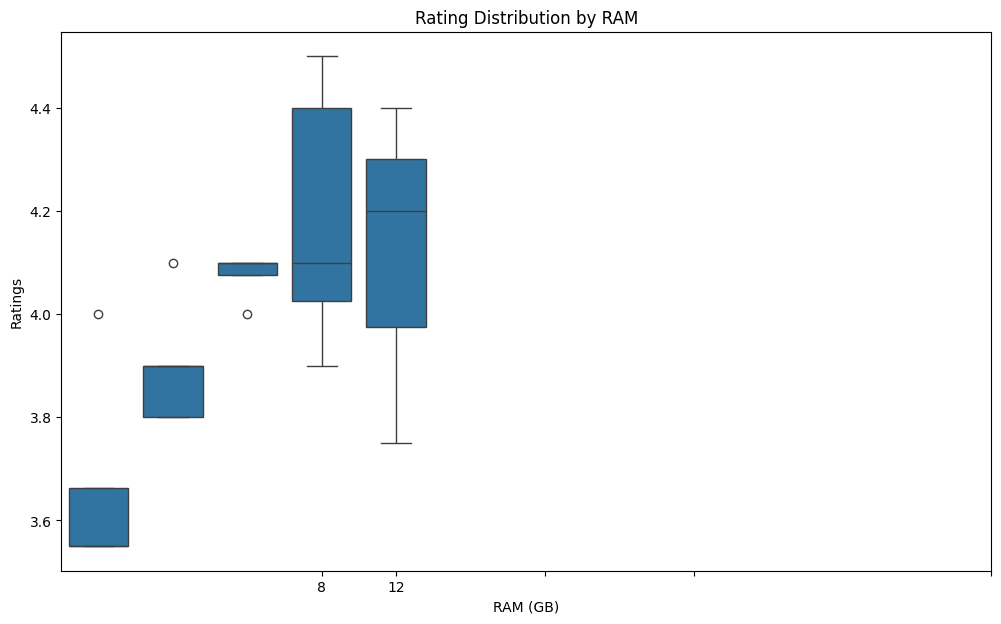

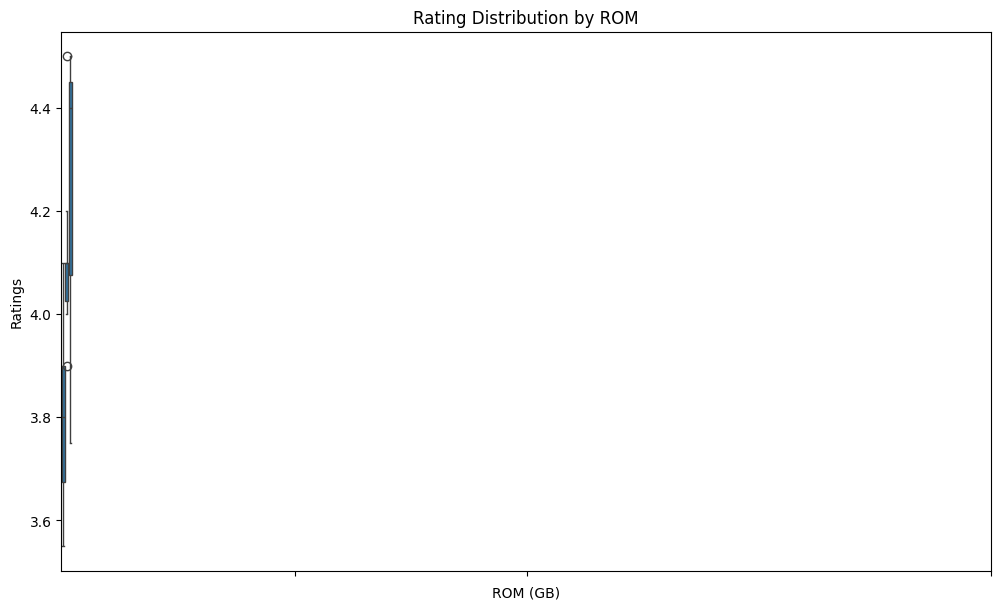


Correlation between RAM and Ratings: 0.57
Correlation between ROM and Ratings: 0.57


In [39]:
# Analyze the Relationship

# summary of data acc to Ram/ Rom
print("\nAverage Rating by RAM:")
print(df.groupby('RAM_GB')['ratings'].mean().sort_values(ascending=False))

print("\nAverage Rating by ROM:")
print(df.groupby('ROM_GB')['ratings'].mean().sort_values(ascending=False))

# Visualization (Scatter Plots)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAM_GB', y='ratings', data=df, s=100)
plt.title('Relationship between RAM and Ratings')
plt.xlabel('RAM (GB)')
plt.ylabel('Ratings')
plt.grid(True)
plt.xticks(sorted(df['RAM_GB'].unique()))
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ROM_GB', y='ratings', data=df, s=100)
plt.title('Relationship between ROM and Ratings')
plt.xlabel('ROM (GB)')
plt.ylabel('Ratings')
plt.grid(True)
plt.xticks(sorted(df['ROM_GB'].unique()))
plt.show()

# Box Plots
plt.figure(figsize=(12, 7))
sns.boxplot(x='RAM_GB', y='ratings', data=df)
plt.title('Rating Distribution by RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Ratings')
plt.xticks(sorted(df['RAM_GB'].unique()))
plt.show()

plt.figure(figsize=(12, 7))
sns.boxplot(x='ROM_GB', y='ratings', data=df)
plt.title('Rating Distribution by ROM')
plt.xlabel('ROM (GB)')
plt.ylabel('Ratings')
plt.xticks(sorted(df['ROM_GB'].unique()))
plt.show()

# Correlation (Linear Relationship)
correlation_ram_ratings = df['RAM_GB'].corr(df['ratings'])
correlation_rom_ratings = df['ROM_GB'].corr(df['ratings'])

print(f"\nCorrelation between RAM and Ratings: {correlation_ram_ratings:.2f}")
print(f"Correlation between ROM and Ratings: {correlation_rom_ratings:.2f}")

In [40]:
#check for a csv file for summary of project